# INM433 Visual Analytics Coursework
### Arshad Ahmed 
#### MSc Data Science 2015/16


# Contents

## 1: Introduction
    + Aims
    + Description of dataset
    + Methods to be used
    
## 2: Data Processing
    + Data Import
    + Preprocessing
    + Visualisation
    + Basic statistics
    + Observations
    

# 1: Introduction

***
### Aim

Our aim is to test the accuracy of a neural network model and an SVM in classifying wines as red or white based on their chemical properties. To do this experiment we use the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) from the UCI Machine Learning Repository.

### Description of the dataset

>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

**Source:**
>Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009

### Attribute Information

Input variables (based on physicochemical tests): 
+ fixed acidity 
+ volatile acidity 
+ citric acid 
+ residual sugar 
+ chlorides 
+ free sulfur dioxide 
+ total sulfur dioxide 
+ density 
+ pH 
+ sulphates 
+ alcohol 
+ quality (score between 0 and 10)
+ **Color: red or white: this our target variable which we will add to the data**


# 2: Data Processing

In [87]:
#Import Libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.metrics import *
from sklearn.cluster import *
from pandas.tools.plotting import *
%matplotlib inline
import random

In [57]:
#set plotting context
sns.set(context='paper', style='dark', palette='husl', font='sans-serif')

In [3]:
#for reproducibility
random.seed(11111111111111111111111111111)

# Import data

In [4]:
red = pd.io.parsers.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',\
                            delimiter=';')
white = pd.io.parsers.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',\
                            delimiter=';')

In [5]:
#Add class labels
red["Color"] = 0
white["Color"] = 1

In [47]:
#join both datasets together
data =  pd.concat([red,white])
print('Data after merging \n',data.head())
print('Total Samples: ', data.shape[0])
print('Total Columns: ', data.shape[1])

Data after merging 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  Color  
0      9.4        5      0  
1      

In [51]:
#Shuffle df
data = data.iloc[np.random.permutation(len(data))]

In [52]:
#Reset index 
data.reset_index(level = 0, inplace = True)

In [53]:
#Drop old index (not needed column)
data = data.drop('index', axis = 1)

In [54]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,6.6,0.25,0.41,7.4,0.043,29,151,0.99460,3.15,0.60,10.20,7,1
1,5.9,0.22,0.30,1.3,0.052,42,86,0.99069,3.31,0.47,11.55,6,1
2,6.8,0.26,0.34,13.9,0.034,39,134,0.99490,3.33,0.53,12.00,6,1
3,6.0,0.32,0.32,4.8,0.041,40,186,0.99235,3.22,0.54,11.00,6,1
4,6.7,0.18,0.28,10.2,0.039,29,115,0.99469,3.11,0.45,10.90,7,1


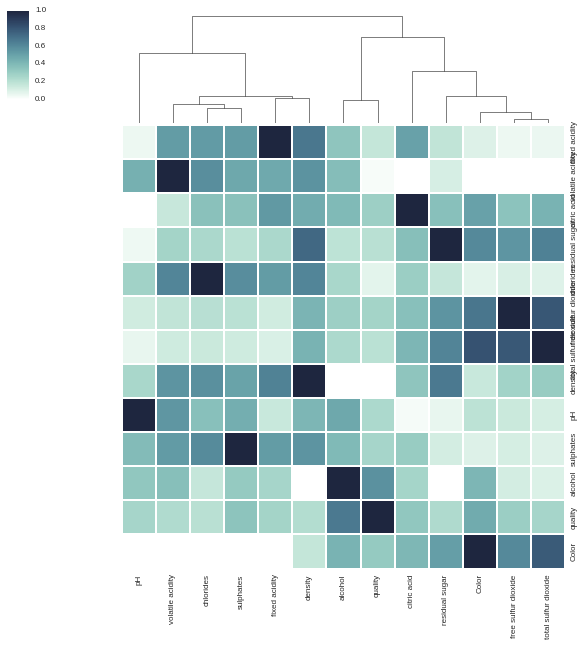

In [58]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
#with column wise standardization
clust = sns.clustermap(data.corr(), metric='cosine', cmap=cmap, linewidths=1, standard_scale=1,
                      row_cluster=False)


In [56]:
clust.dendrogram_col.reordered_ind

[8, 1, 4, 9, 0, 7, 10, 11, 2, 3, 12, 5, 6]

In [59]:
import time
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


There is an issue with scale in the data so we will scale it to remove its effects

In [61]:
from sklearn.preprocessing import StandardScaler


In [101]:
colnames =list(data)
colnames[:-2]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [102]:
feat= data[colnames[:-1]]
feat = StandardScaler().fit_transform(feat)

In [103]:
labels = data[colnames[11]]
labels

0       7
1       6
2       6
3       6
4       7
5       6
6       6
7       6
8       6
9       6
10      5
11      6
12      5
13      6
14      7
15      6
16      7
17      7
18      6
19      7
20      5
21      6
22      6
23      5
24      5
25      5
26      4
27      6
28      6
29      6
       ..
6467    5
6468    6
6469    6
6470    6
6471    5
6472    6
6473    5
6474    5
6475    6
6476    5
6477    6
6478    6
6479    6
6480    6
6481    6
6482    5
6483    6
6484    4
6485    5
6486    6
6487    6
6488    7
6489    6
6490    6
6491    5
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, dtype: int64

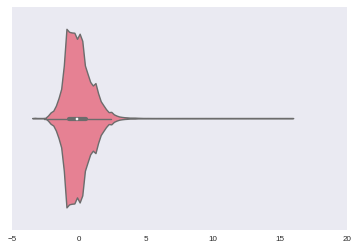

In [104]:
sns.violinplot(feat, orient="h")

In [105]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(feat)
labels_db = db.labels_

In [106]:
from sklearn import metrics

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_db, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_db, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_db, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_db, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_db, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(feat, labels))

/home/arshad/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  a = np.mean(distances_row[mask])
/home/arshad/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  for cur_label in set(labels) if not cur_label == label])


Estimated number of clusters: 7
Homogeneity: 1.000
Completeness: -0.000
V-measure: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: -0.051


/home/arshad/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
/home/arshad/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


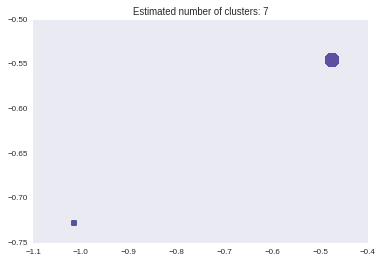

In [107]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = feat[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = feat[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()